In [4]:
pd.set_option('display.max_columns', None) # To show all columns
pd.set_option('display.width', None)       # To ensure wide DataFrames are not wrapped

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NYC_property_sales_regression/PLUTO.csv')

/tmp/ipython-input-3087659002.py:2: DtypeWarning: Columns (17,18,20,21,22,24,25,52,61,62,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/NYC_property_sales_regression/PLUTO.csv')


In [5]:
df

,borough,Tax block,Tax lot,community board,census tract 2010,cb2010,schooldist,council district,postcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,BBL,condono,tract2010,xcoord,ycoord,latitude,longitude,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,dcpedited,notes,bct2020,bctcb2020,geom,basempdate,dcasdate,edesigdate,landmkdate,masdate,polidate,rpaddate,zoningdate
0,QN,11015,1,412.0,522.0,1011.0,29.0,27.0,11412.0,E317,113.0,3520.0,4.0,6E,114-03 198 STREET,R4-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,A5,1.0,0.0,NaN,"SANKER, BERNICE",3052.0,1924.0,0.0,1924.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,61.03,50.0,26.0,37.0,N,1.0,False,3.0,2.0,13200.0,55200.0,31680.0,1945.0,0.0,0.0,NaN,NaN,0.63,1.00,0.0,2.0,4,4110150001,NaN,522.0,1051854.0,194191.0,40.699428,-73.756191,15b,NaN,407 076,44804.0,NaN,4.110150e+09,08/16/2013,1,25v3.1,12.0,44.0,NaN,NaN,NaN,NaN,4052200.0,4.052200e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QN,10992,35,412.0,522.0,1007.0,29.0,27.0,11412.0,L150,113.0,3520.0,4.0,4E,113-41 197 STREET,R2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,B3,1.0,0.0,NaN,"SINGH, HARDAI",3000.0,1672.0,0.0,1672.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.5,2.0,2.0,30.00,100.0,20.0,28.0,EG,1.0,False,5.0,2.0,12720.0,40920.0,0.0,1925.0,0.0,0.0,NaN,NaN,0.56,0.75,0.0,1.0,4,4109920035,NaN,522.0,1051580.0,194247.0,40.699584,-73.757179,15b,NaN,407 076,44804.0,NaN,NaN,NaN,1,25v3.1,12.0,44.0,NaN,NaN,NaN,NaN,4052200.0,4.052200e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,QN,11014,22,412.0,522.0,1010.0,29.0,27.0,11412.0,E317,113.0,3520.0,4.0,6E,114-34 198 STREET,R4B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,A5,1.0,0.0,NaN,"ROSEBOROUGH, SHERRIE",2000.0,1160.0,0.0,1160.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,20.00,100.0,20.0,30.0,N,3.0,False,5.0,2.0,9240.0,36900.0,1420.0,1945.0,0.0,0.0,NaN,NaN,0.58,1.00,0.0,2.0,4,4110140022,NaN,522.0,1051823.0,193855.0,40.698506,-73.756306,15b,NaN,407 076,44804.0,NaN,NaN,NaN,1,25v3.1,12.0,44.0,NaN,NaN,NaN,NaN,4052200.0,4.052200e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,QN,11014,59,412.0,522.0,1010.0,29.0,27.0,11412.0,E317,113.0,3520.0,4.0,6E,114-39 197 STREET,R4B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,A5,1.0,0.0,NaN,"SWEETWINE, SARAH G",2500.0,870.0,0.0,870.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,25.00,100.0,16.0,28.0,N,2.0,False,5.0,2.0,9420.0,32460.0,20310.0,1950.0,0.0,0.0,NaN,NaN,0.35,1.00,0.0,2.0,4,4110140059,NaN,522.0,1051737.0,193797.0,40.698347,-73.756617,15b,NaN,407 076,44804.0,NaN,NaN,NaN,1,25v3.1,12.0,44.0,NaN,NaN,NaN,NaN,4052200.0,4.052200e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QN,10992,24,412.0,522.0,1007.0,29.0,27.0,11412.0,L150,113.0,3520.0,4.0,4E,113-26 198 STREET,R2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,A1,1.0,0.0,NaN,"KEANE, LLOYD",3000.0,1672.0,0.0,1672.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.5,1.0,1.0,30.00,100.0,20.0,28.0,G,1.0,False,5.0,2.0,12840.0,39780.0,0.0,1930.0,0.0,0.0,NaN,NaN,0.56,0.75,0.0,1.0,4,4109920024,NaN,522.0,1051631.0,194410.0,40.700031,-73.756993,15b,NaN,407 076,44804.0,NaN,NaN,NaN,1,25v3.1,12.0,44.0,NaN,NaN,NaN,NaN,4052200.0,4.052200e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858284 entries, 0 to 858283
Columns: 101 entries, borough to zoningdate
dtypes: float64(68), int64(5), object(28)
memory usage: 661.4+ MB


In [8]:
df.isnull().sum()

,0
borough,0
Tax block,0
Tax lot,0
community board,1154
census tract 2010,1176
...,...
landmkdate,858284
masdate,858284
polidate,858284
rpaddate,858284


In [21]:
columns_to_keep = ['borough', 'Tax block', 'Tax lot', 'postcode', 'yearbuilt', 'latitude', 'longitude']
df_modified = df[columns_to_keep].copy()
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858284 entries, 0 to 858283
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   borough    858284 non-null  object 
 1   Tax block  858284 non-null  int64  
 2   Tax lot    858284 non-null  int64  
 3   postcode   856391 non-null  float64
 4   yearbuilt  857950 non-null  float64
 5   latitude   857025 non-null  float64
 6   longitude  857025 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 45.8+ MB


In [22]:
df_modified

,borough,Tax block,Tax lot,postcode,yearbuilt,latitude,longitude
0,QN,11015,1,11412.0,1945.0,40.699428,-73.756191
1,QN,10992,35,11412.0,1925.0,40.699584,-73.757179
2,QN,11014,22,11412.0,1945.0,40.698506,-73.756306
3,QN,11014,59,11412.0,1950.0,40.698347,-73.756617
4,QN,10992,24,11412.0,1930.0,40.700031,-73.756993
...,...,...,...,...,...,...,...
858279,QN,1526,64,11373.0,0.0,40.742197,-73.884477
858280,BK,1279,200,11213.0,NaN,40.668013,-73.940391
858281,BK,7419,18,11235.0,NaN,40.591595,-73.952586
858282,BK,3189,3,11237.0,0.0,40.706511,-73.922180


In [23]:
df_modified['borough'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 858284 entries, 0 to 858283
Series name: borough
Non-Null Count   Dtype 
--------------   ----- 
858284 non-null  object
dtypes: object(1)
memory usage: 6.5+ MB


In [24]:
df_modified['borough'].value_counts()

,count
borough,
QN,324467
BK,276222
SI,125557
BX,89465
MN,42573


In [25]:
borough_mapping = {
    'MN': 1,
    'BX': 2,
    'BK': 3,
    'QN': 4,
    'SI': 5
}
df_modified['borough'] = df_modified['borough'].map(borough_mapping).astype(int)
df_modified['borough'].value_counts()

,count
borough,
4,324467
3,276222
5,125557
2,89465
1,42573


In [26]:
df_modified['postcode'] = df_modified['postcode'].astype(pd.Int64Dtype())
df_modified.info()
display(df_modified.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858284 entries, 0 to 858283
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   borough    858284 non-null  int64  
 1   Tax block  858284 non-null  int64  
 2   Tax lot    858284 non-null  int64  
 3   postcode   856391 non-null  Int64  
 4   yearbuilt  857950 non-null  float64
 5   latitude   857025 non-null  float64
 6   longitude  857025 non-null  float64
dtypes: Int64(1), float64(3), int64(3)
memory usage: 46.7 MB


,borough,Tax block,Tax lot,postcode,yearbuilt,latitude,longitude
0,4,11015,1,11412,1945.0,40.699428,-73.756191
1,4,10992,35,11412,1925.0,40.699584,-73.757179
2,4,11014,22,11412,1945.0,40.698506,-73.756306
3,4,11014,59,11412,1950.0,40.698347,-73.756617
4,4,10992,24,11412,1930.0,40.700031,-73.756993


In [27]:
df['postcode'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 858284 entries, 0 to 858283
Series name: postcode
Non-Null Count   Dtype  
--------------   -----  
856391 non-null  float64
dtypes: float64(1)
memory usage: 6.5 MB


In [28]:
df['postcode'].isnull().sum()

np.int64(1893)

In [30]:
df['yearbuilt'].isnull().sum()

np.int64(334)

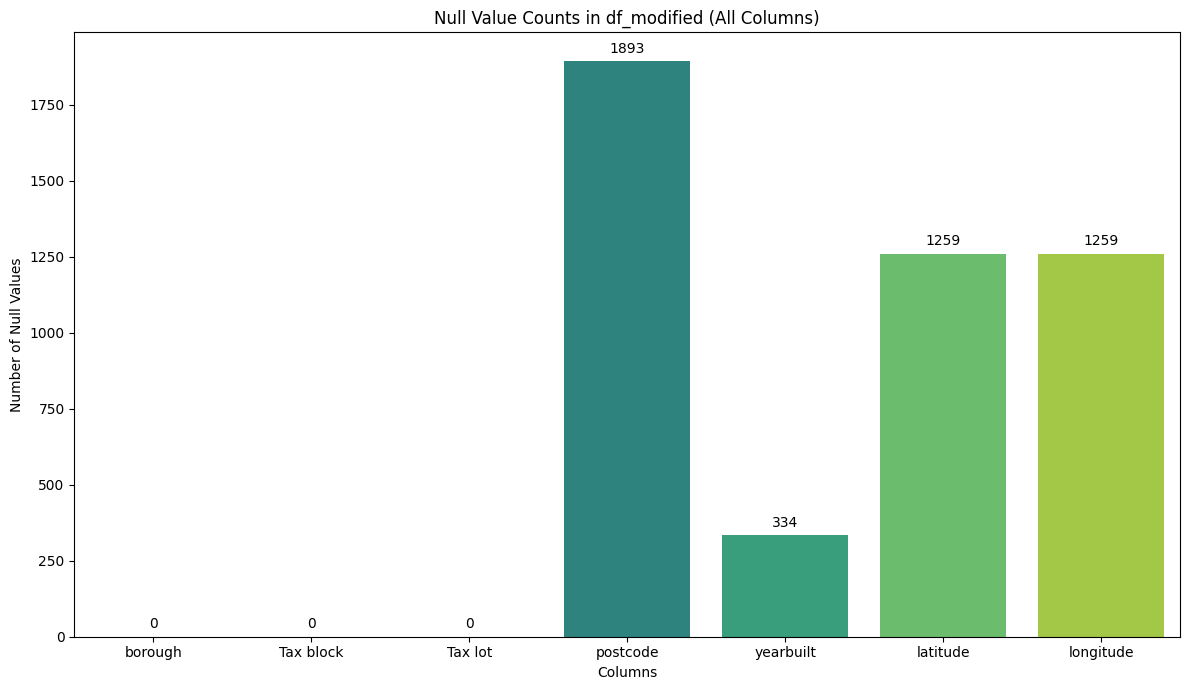

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate null counts for df_modified for all columns
null_counts_all = df_modified.isnull().sum()

# Plot all columns, even those with zero null values
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=null_counts_all.index, y=null_counts_all.values, hue=null_counts_all.index, palette='viridis', legend=False)

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Null Value Counts in df_modified (All Columns)')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

In [29]:
df_modified['yearbuilt'] = df_modified['yearbuilt'].astype(pd.Int64Dtype())
df_modified.info()
display(df_modified.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858284 entries, 0 to 858283
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   borough    858284 non-null  int64  
 1   Tax block  858284 non-null  int64  
 2   Tax lot    858284 non-null  int64  
 3   postcode   856391 non-null  Int64  
 4   yearbuilt  857950 non-null  Int64  
 5   latitude   857025 non-null  float64
 6   longitude  857025 non-null  float64
dtypes: Int64(2), float64(2), int64(3)
memory usage: 47.5 MB


,borough,Tax block,Tax lot,postcode,yearbuilt,latitude,longitude
0,4,11015,1,11412,1945,40.699428,-73.756191
1,4,10992,35,11412,1925,40.699584,-73.757179
2,4,11014,22,11412,1945,40.698506,-73.756306
3,4,11014,59,11412,1950,40.698347,-73.756617
4,4,10992,24,11412,1930,40.700031,-73.756993


In [38]:
df_modified.to_csv('/content/drive/MyDrive/NYC_property_sales_regression/PLUTO_cleaned.csv', index=False)